# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [1]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [2]:
# scrape the data
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
web = requests.get(url)
print(web.status_code) #make sure we can access the website
src = web.content #see the content of the website
soup = BeautifulSoup(src) #turn the content into a soup object

200


#### Ran this code and examined the website using the google developer tab (F12) and also right clicking inspect on the desired info I want to scrape. All product names are under the heading.


In [4]:
product_name_list = [] #establish a new empty list
for product in soup.find_all('h3'): #iterate through the soup object to find all <h3> headings
    product_name_list.append(product.get_text()) #return only the text from that <h3> heading
                                                 #and put it in our empty list
    

In [5]:
df_raw = pd.DataFrame(product_name_list, columns=['productNames']) #raw data df.. need to be examined
df = df_raw.iloc[:36] #everything good but needed to remove the last two items that were not products
df.to_csv('part1.csv', index=False)# save the data as a csv file

In [6]:
# display df.head()
df.head()

,productNames
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [7]:
part2 = pd.read_csv('./data/part2.csv')
part2.head()


,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [8]:
for column in part2: #iterate through the columns in the part 2 dataframe
    part2[column + '_zscores'] = stats.zscore(part2[column])
    #create a new column add _zscore to the column name and calculate the respective z_score
part2.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460301,-0.913613,-1.103276
1,46777.0,-12.0,2,-0.794061,-1.080776,-0.668162
2,50013.0,50.0,5,0.014927,0.992046,0.637182
3,48983.0,-13.0,0,-0.242569,-1.114209,-1.538391
4,50751.0,-11.0,6,0.199425,-1.047343,1.072296


In [9]:
# create a function that calculates the zscores of an array
def get_zscore(data):
    data = np.array(data) #just in case we accidentally call a list
    mu = data.mean() #could also use data.sum() / len(data)
    std = data.std()
    z_lst = []
    for point in data:
        z = (point - mu) / std
        z_lst.append(z)
    z_lst = np.array(z_lst)
    return z_lst

In [10]:
# calculate the zscore for each column and store them as a new column with the names used above
part2['eventOutcome_test_myzfunc'] = get_zscore(part2['eventOutcome'])

if part2['eventOutcome_zscores'].equals( part2['eventOutcome_test_myzfunc']):
    print('My Function Works! :)')
else:
    print('My Function Doesnt Work :(')
# .equals() prints true so my fucntion works

My Function Works! :)


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

[Text(0.5, 0, 'NPS Score')]

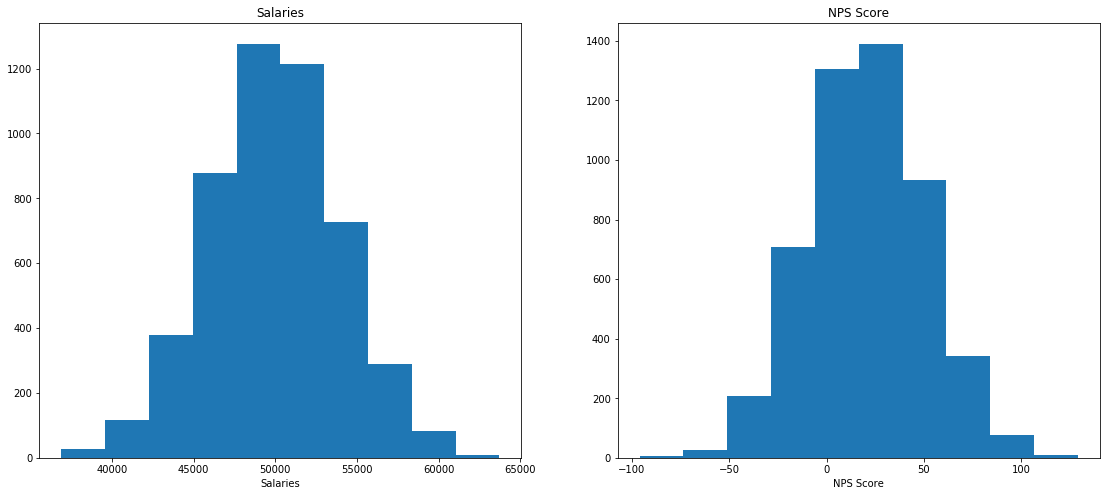

In [11]:
# plot for raw salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(19,8))

ax1.hist(part2['salaries'])
ax1.set_title('Salaries')
ax1.set(xlabel = 'Salaries')

ax2.hist(part2['NPS Score'])
ax2.set_title('NPS Score')
ax2.set(xlabel = 'NPS Score')

[Text(0.5, 0, 'NPS Score Z-Scores')]

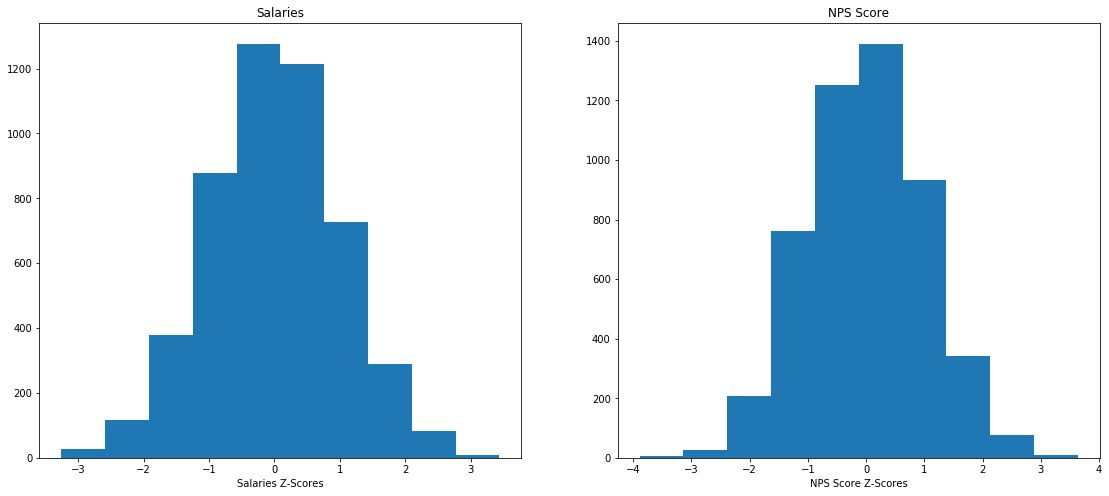

In [12]:
# plot for zscores for salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(19,8))

ax1.hist(part2['salaries_zscores'])
ax1.set_title('Salaries')
ax1.set(xlabel = 'Salaries Z-Scores')

ax2.hist(part2['NPS Score_zscores'])
ax2.set_title('NPS Score')
ax2.set(xlabel = 'NPS Score Z-Scores')

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

Text(0, 0.5, 'Probability')

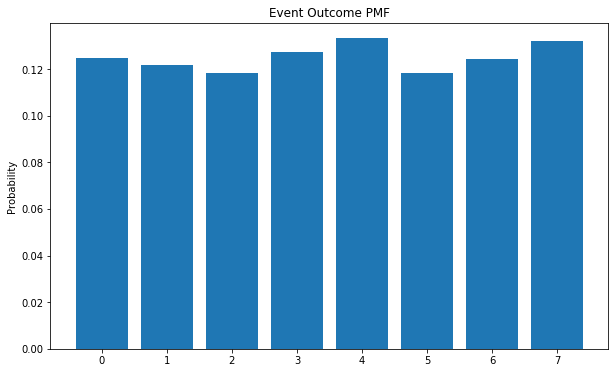

In [13]:
from collections import Counter

freq = {}
for outcome in part2['eventOutcome']: #count the frequency of the event outcome
    if (outcome in freq):
        freq[outcome] += 1
    else:
        freq[outcome] = 0

total_outcomes = sum(freq.values()) #count the total outcomes in the sample

for k,v in freq.items():
    freq[k] = v/total_outcomes #divide the counts by the total number of samples to get probability
freq.values()



plt.figure(figsize=(10,6))
plt.bar(freq.keys(), freq.values())
plt.title('Event Outcome PMF')
plt.ylabel('Probability')




# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

Text(0.5, 0, 'Event Outcome')

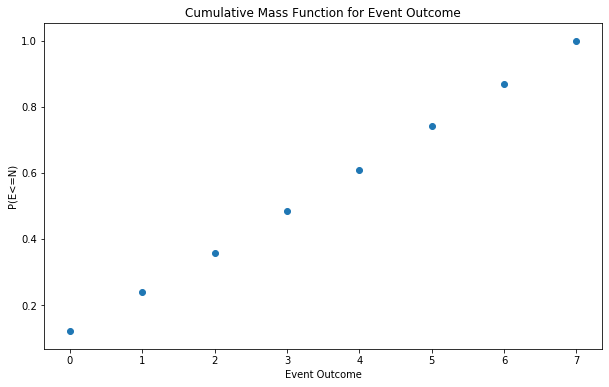

In [14]:
prob_array = np.array(list(freq.values()))

cdf_array = np.cumsum(prob_array) #use cum sum to build array for cdf last value must equal 1

cdf_dict = {}
for k,v in freq.items(): # create a new dictionary with the event outcomes and their cdf values
    cdf_dict[k] = cdf_array[k] 

plt.figure(figsize=(10,6))
plt.scatter(cdf_dict.keys(),cdf_dict.values())
plt.title('Cumulative Mass Function for Event Outcome')
plt.ylabel('P(E<=N)')
plt.xlabel('Event Outcome')

# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [15]:
# find salaries with zscores <= 2.0 
np.where(part2['salaries_zscores'] <= 2.0) #not sure what else I am supposed to do with this?

salary_zscores_lessthanorequal_2 = part2['salaries_zscores'].iloc[np.where(part2['salaries_zscores'] <= 2.0)]

In [16]:
# calculate skewness and kurtosis of NPS Score column
def get_skewness(data): #
    x_bar = data.mean()
    sigma = data.std()
    skew_lst = []
    for point in data:
        skew = ((point - x_bar)**3) / (sigma**3)
        skew_lst.append(skew)
    skew_lst = np.array(skew_lst)
    return skew_lst

part2['NPS_skewness'] = get_skewness(part2['NPS Score']) #very similar to z score function except cubed
part2.head()
    

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores,eventOutcome_test_myzfunc,NPS_skewness
0,44112.0,-7.0,1,-1.460301,-0.913613,-1.103276,-1.103276,-0.762354
1,46777.0,-12.0,2,-0.794061,-1.080776,-0.668162,-0.668162,-1.262051
2,50013.0,50.0,5,0.014927,0.992046,0.637182,0.637182,0.976034
3,48983.0,-13.0,0,-0.242569,-1.114209,-1.538391,-1.538391,-1.382831
4,50751.0,-11.0,6,0.199425,-1.047343,1.072296,1.072296,-1.148516


In [17]:
def get_kurtosis(data):
    x_bar = data.mean()
    sigma = data.std()
    kurt_lst = []
    for point in data:
        kurt = ((point - x_bar)**4) / (sigma**4)
        kurt_lst.append(kurt)
    kurt_lst = np.array(kurt_lst)
    return kurt_lst

part2['NPS_kurtosis'] = get_kurtosis(part2['NPS Score']) #very similar to z score function except quartic
part2.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores,eventOutcome_test_myzfunc,NPS_skewness,NPS_kurtosis
0,44112.0,-7.0,1,-1.460301,-0.913613,-1.103276,-1.103276,-0.762354,0.696426
1,46777.0,-12.0,2,-0.794061,-1.080776,-0.668162,-0.668162,-1.262051,1.363858
2,50013.0,50.0,5,0.014927,0.992046,0.637182,0.637182,0.976034,0.968174
3,48983.0,-13.0,0,-0.242569,-1.114209,-1.538391,-1.538391,-1.382831,1.540609
4,50751.0,-11.0,6,0.199425,-1.047343,1.072296,1.072296,-1.148516,1.202770


# run the cell below to convert your notebook to a README for assessment

In [18]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Writing 7763 bytes to assessment.md
'mv' is not recognized as an internal or external command,
operable program or batch file.
